# GRIP : THE SPARK FOUNDATION

## Data Science and Business Analytic Intern

## Author : Raj Gandhi

## Task : Exploratory Data Analysis on ‘Indian Premier League’

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
# Import the dataset
matches = pd.read_csv("/content/drive/Shareddrives/Raj/IPL/matches.csv")
deliveries = pd.read_csv("/content/drive/Shareddrives/Raj/IPL/deliveries.csv")

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Drop id and umpires columns since it doesn't provide any additional insights
matches.drop(["id", "umpire1", "umpire2", "umpire3"], axis=1, inplace=True)

In [6]:
deliveries.shape

(179078, 21)

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Data Cleaning

In [8]:
#Replacing the Full names by short names
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant', 'Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS', 'DD'],inplace=True)

#Replacing the Full names by short names
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant', 'Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS', 'DD'],inplace=True)

## EDA

### No of seasons in the dataset

In [9]:
# No of seasons
matches["season"].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### Matches played in each seasons

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



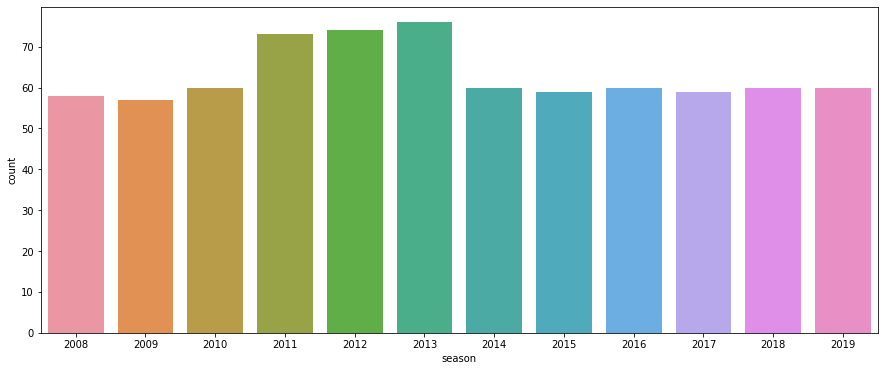

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(matches["season"]);

### Matches played in each venue

In [13]:
fig = px.histogram(matches, x="venue", template="presentation+plotly_dark", height=900).update_xaxes(categoryorder="total descending")
fig.show()

### Overview of matches played

In [14]:
stats = pd.DataFrame({
    "matches_played": matches["team1"].value_counts() + matches["team2"].value_counts(),
    "Wins": matches["winner"].value_counts()
})
stats["Lost"] = stats["matches_played"] - stats["Wins"]
stats["Win_percentage"] = round((stats["Wins"]  * 100 ) / stats["matches_played"], 2)
stats["Lose_percentage"] = round((stats["Lost"] * 100) / stats["matches_played"], 2)
stats.sort_values(by="Wins", ascending=False)

,matches_played,Wins,Lost,Win_percentage,Lose_percentage
MI,187,109,78,58.29,41.71
CSK,164,100,64,60.98,39.02
KKR,178,92,86,51.69,48.31
RCB,180,84,96,46.67,53.33
KXIP,176,82,94,46.59,53.41
DD,177,77,100,43.50,56.50
RR,147,75,72,51.02,48.98
SRH,108,58,50,53.70,46.30
DC,75,29,46,38.67,61.33
RPS,30,15,15,50.00,50.00


### Which is the most successful team

In [15]:
fig = px.histogram(matches, x="winner", template="presentation+plotly_dark", height=500).update_xaxes(categoryorder="total descending")
fig.show()

### Most successful player



In [16]:
fig = px.histogram(matches, x="player_of_match", template="presentation+plotly_dark").update_xaxes(categoryorder="total descending")
fig.show()

### Toss winner and decision

In [17]:
fig = px.histogram(matches, x="toss_winner", y="toss_decision", color="toss_decision", template="presentation+plotly_dark").update_xaxes(categoryorder="total descending")
fig.show()

### Venue with their winner

In [18]:
match = matches.dropna()
fig = px.histogram(match, x="venue", y="winner", color="winner", template="presentation+plotly_dark", height=1000).update_xaxes(categoryorder="total descending")
fig.show()

## Deliveries

### Most runs by a team

In [19]:
runs = deliveries.groupby(by="batting_team").agg({"total_runs":"sum"}).sort_values(by="total_runs", ascending=False)

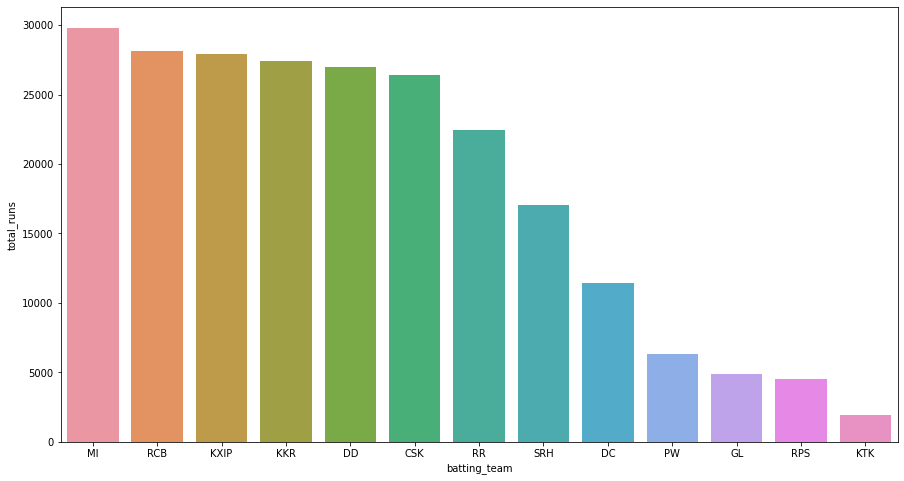

In [20]:
plt.figure(figsize=(15, 8))
sns.barplot(x=runs.index, y=runs["total_runs"]);

### Most wickets by a team

In [21]:
wickets = deliveries.groupby(by="bowling_team").agg({"player_dismissed":'count'}).sort_values(by="player_dismissed", ascending=False)

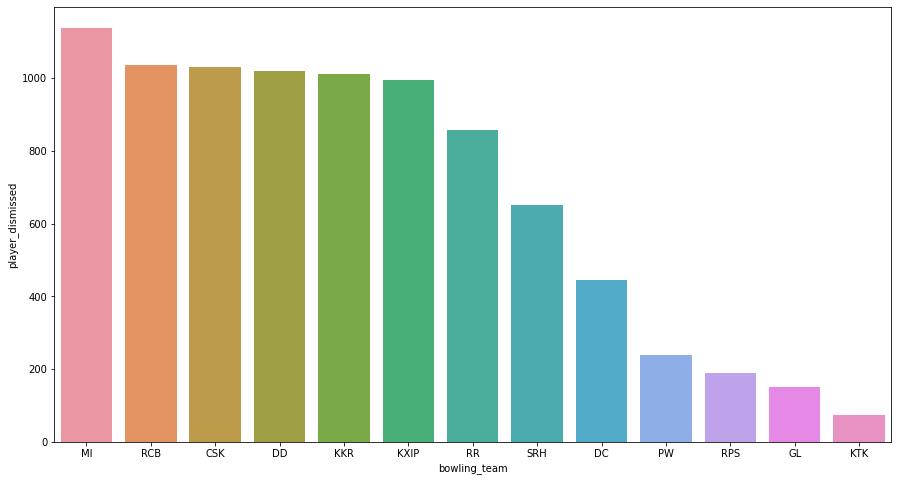

In [22]:
plt.figure(figsize=(15, 8))
sns.barplot(x=wickets.index, y=wickets["player_dismissed"]);

### Most runs in a powerplay

In [23]:
powerplay = deliveries[deliveries["over"] <= 6]

In [24]:
runs_powerplay = powerplay.groupby(by="batting_team").agg({'total_runs':'sum'}).copy().sort_values(by="total_runs", ascending=False)
wickets_powerplay = powerplay.groupby(by="bowling_team").agg({'player_dismissed':'count'}).copy().sort_values(by="player_dismissed", ascending=False)

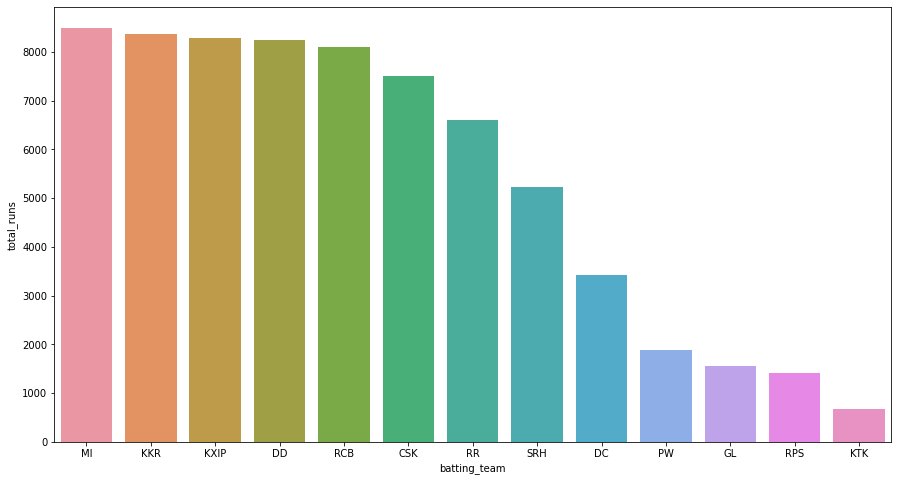

In [25]:
plt.figure(figsize=(15, 8))
sns.barplot(x=runs_powerplay.index, y=runs_powerplay["total_runs"]);

### Most wickets in powerplay

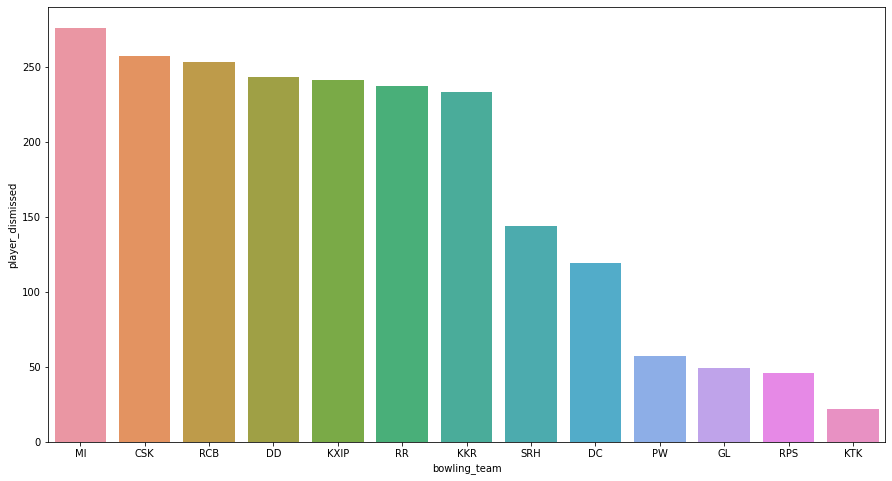

In [26]:
plt.figure(figsize=(15, 8))
sns.barplot(x=wickets_powerplay.index, y=wickets_powerplay["player_dismissed"]);

### Most runs by a player

In [27]:
runs_player = deliveries.groupby(by="batsman").agg({"total_runs":'sum'}).copy().sort_values(by="total_runs", ascending=False)

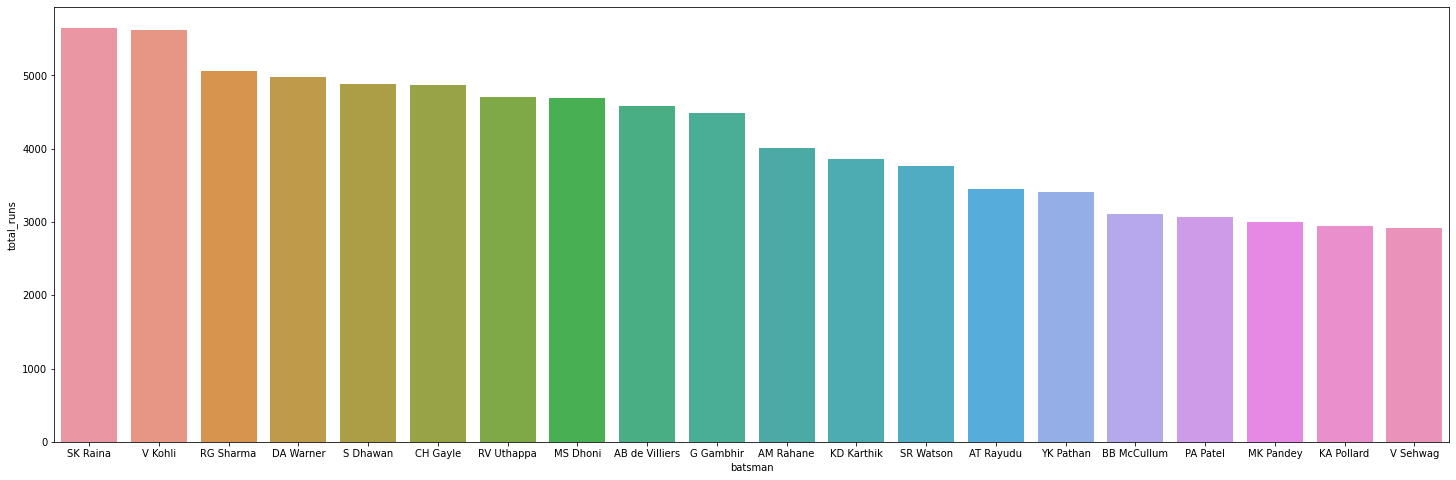

In [28]:
# Top 20 players throughout the seasons
plt.figure(figsize=(25, 8))
sns.barplot(x=runs_player.index[:20], y=runs_player["total_runs"][:20]);

### Most wickets by a player

In [29]:
wickets_player = deliveries.groupby(by="bowler").agg({"player_dismissed" : 'count'}).copy().sort_values(by="player_dismissed", ascending=False)

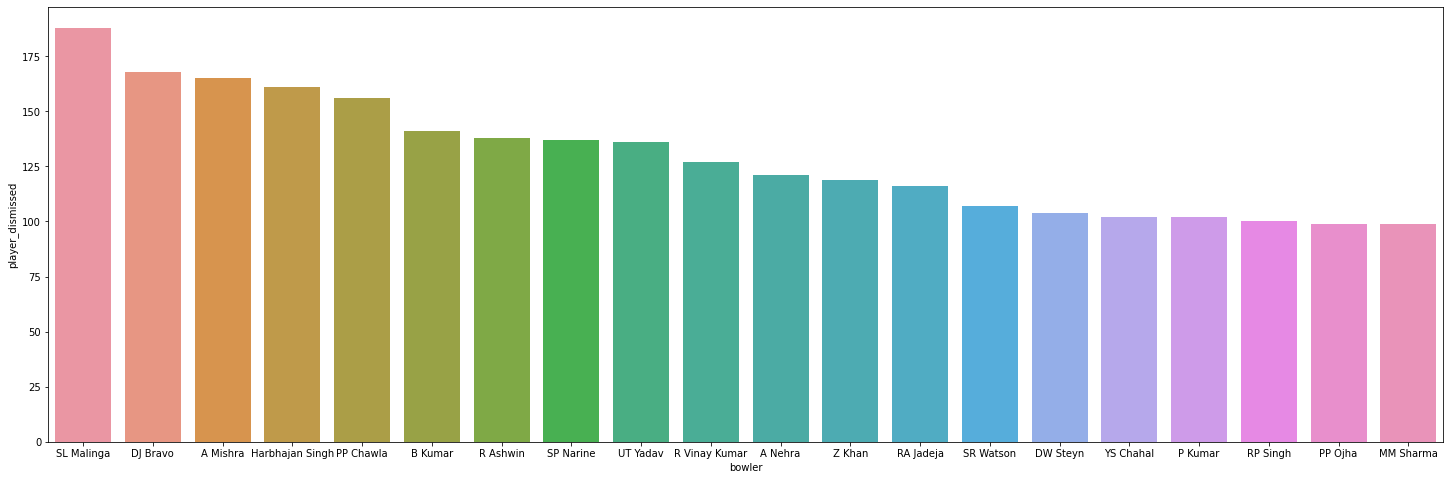

In [30]:
plt.figure(figsize=(25, 8))
sns.barplot(x=wickets_player.index[:20], y=wickets_player["player_dismissed"][:20])

### Best Partnership 

In [31]:
partnership = deliveries.groupby(["batsman", "non_striker"]).agg({"total_runs":'sum'}).sort_values(by="total_runs", ascending=False)
partnership.head(10)

total_runs
batsman        non_striker               
CH Gayle       V Kohli               1617
AB de Villiers V Kohli               1464
DA Warner      S Dhawan              1420
V Kohli        AB de Villiers        1396
               CH Gayle              1185
RV Uthappa     G Gambhir             1077
S Dhawan       DA Warner              937
G Gambhir      RV Uthappa             829
SK Raina       MS Dhoni               786
DR Smith       BB McCullum            738

### Players with most 4's

In [32]:
most_4s = deliveries[deliveries["batsman_runs"] == 4].groupby("batsman").agg({"batsman_runs":'count'}).sort_values(by="batsman_runs", ascending=False)

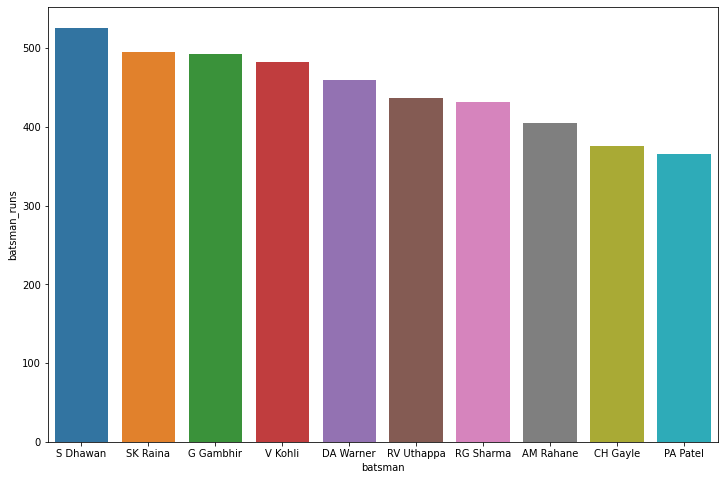

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x=most_4s.index[:10], y=most_4s["batsman_runs"][:10]);

### Players with most 6's

In [34]:
most_6s = deliveries[deliveries["batsman_runs"] == 6].groupby("batsman").agg({"batsman_runs":'count'}).sort_values(by="batsman_runs", ascending=False)

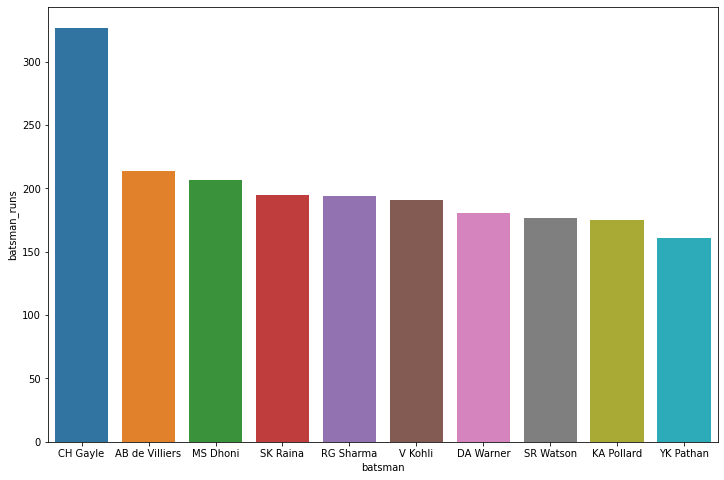

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x=most_6s.index[:10], y=most_6s["batsman_runs"][:10]);

### Dismissal Kind

In [36]:
fig = px.histogram(deliveries, x="dismissal_kind", template="presentation+plotly_dark", height=400)
fig.show()

## Conclusions:


*   Eden Gardens have hosted the most number of matches followed by Wankhede and M Chinnaswamy stadium.

*   Mumbai Indians is the most successful team with win percentage of 58.3%.

*   Chris Gayle is the most successful player with the highest player of the match award.

*   MI socred the most number of runs throughout the league and in the powerplay.

*   MI has also picked up highest number of wickets in IPL and in the powerplay.

*   Suresh Raina have the highest number of runs throughout the IPL.

*   Lasith Malinga took the highest number of wickets in IPL.

*   The partnership of Chris Gayle and Virat Kohli is the most successful.

*   S Dhawan has hit the most 4's.

*   Chris Gayle has hit the most 6's.



